<a href="https://colab.research.google.com/github/IveenNet/ColabPython/blob/main/NeuralNetworksClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [51]:
!pip install -q torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.3 MB/s eta 0:00:00


In [71]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from torch import nn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from torchmetrics.classification import BinaryAccuracy, MulticlassAccuracy
from matplotlib.colors import ListedColormap

#Variables

In [35]:
# Setup device agnostic code
_device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {_device}")

# Setup random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Random state
RANDOM_STATE = 42

Device: cpu


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [36]:
# Make 1000 samples
_num_samples = 1000
_noise = 0.03

# Create circles
X, y = make_moons(_num_samples,
                    noise=_noise,
                    random_state=RANDOM_STATE)

In [37]:
len(X), len(y)

(1000, 1000)

In [38]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 [ 0.41276802 -0.37638459]
 [-0.84532016  0.52879908]]
First 5 samples of y: [1 1 1 1 0]


In [39]:
# Turn data into a DataFrame
moon = pd.DataFrame({"X0": X[:, 0],
                        "X1": X[:, 1],
                        "label": y})
moon.head(10)

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
5,0.579542,-0.352979,1
6,0.294884,-0.209238,1
7,-0.014488,0.435896,1
8,1.626510,-0.281207,1
9,0.671598,0.786422,0


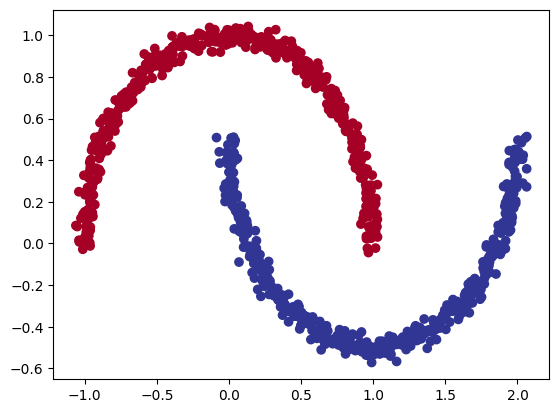

In [40]:
# Visualizando los datos
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [41]:
# Turn data into tensors of dtype float
# Turn data into tensors
# Convertir X e y a tensores
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32).unsqueeze(1)

print(X.shape)
print(y.shape)

X[:5], y[:5]

torch.Size([1000, 2])
torch.Size([1000, 1])


(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764],
         [-0.8453,  0.5288]]),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [0.]]))

In [42]:
# Split the data into train and test sets (80% train, 20% test)
_train=0.8
_test=0.2

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=_train,
                                                    test_size=_test,
                                                    random_state=RANDOM_SEED)

In [43]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [44]:
# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=1)

        # Activación no lineal
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        return x

# Instantiate the model
model_0 = MoonModelV0().to(_device)
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
next(model_0.parameters()).device

device(type='cpu')

In [46]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]])),
             ('layer_1.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265])),
             ('layer_2.weight',
              tensor([[ 0.1270, -0.1524,

In [47]:
# Enviamos los datos de test al mismo dispositivo del modelo
X_test = X_test.to(_device)
y_test = y_test.to(_device)

# Hacer predicciones sin entrenar
with torch.inference_mode():
    logits = model_0(X_test)               # Logits sin aplicar sigmoid
    probs = torch.sigmoid(logits)          # Convertir logits en probabilidades
    preds = (probs > 0.5).int()            # Umbral para obtener clase (0 o 1)

# Mostrar info
print(f"Total predicciones: {len(preds)}, Forma: {preds.shape}")
print(f"Total muestras de test: {len(X_test)}, Forma: {X_test.shape}")
print(f"\nPrimeras 10 probabilidades:\n{probs[:10].cpu().numpy().flatten()}")
print(f"\nPrimeras 10 predicciones:\n{preds[:10].cpu().numpy().flatten()}")
print(f"Primeras 10 etiquetas reales:\n{y_test[:10].cpu().numpy().flatten()}")

Total predicciones: 200, Forma: torch.Size([200, 1])
Total muestras de test: 200, Forma: torch.Size([200, 2])

Primeras 10 probabilidades:
[0.556783   0.5669196  0.58205545 0.5631088  0.6221886  0.63121164
 0.5818166  0.58443624 0.5752097  0.5652524 ]

Primeras 10 predicciones:
[1 1 1 1 1 1 1 1 1 1]
Primeras 10 etiquetas reales:
[1. 0. 1. 0. 1. 1. 0. 0. 1. 0.]


## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [48]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss() #Porque tenemos solo una salida

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.1)

In [32]:
# Calculate accuracy - out of 100 examples, what percentage doew our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [50]:
print("Logits:")
print(logits[:10])

print("\nPred probs:")
print(probs[:10])

print("\nPred labels:")
print(preds[:10])

print(f"\nAccuracy sin entrenar: {accuracy_fn(y_test.int(), preds):.2f}%")

Logits:
tensor([[0.2281],
        [0.2693],
        [0.3312],
        [0.2538],
        [0.4988],
        [0.5374],
        [0.3302],
        [0.3410],
        [0.3031],
        [0.2625]])

Pred probs:
tensor([[0.5568],
        [0.5669],
        [0.5821],
        [0.5631],
        [0.6222],
        [0.6312],
        [0.5818],
        [0.5844],
        [0.5752],
        [0.5653]])

Pred labels:
tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.int32)

Accuracy sin entrenar: 69.50%


In [53]:
# Crear la métrica de accuracy para clasificación binaria
acc_fn = BinaryAccuracy().to(_device)
acc_fn

BinaryAccuracy()

In [54]:
# Calcular precisión usando torchmetrics
acc = acc_fn(preds, y_test.int())
print(f"Accuracy (TorchMetrics): {acc.item()*100:.2f}%")

✅ Accuracy (TorchMetrics): 69.50%


In [55]:
## TODO: Set the seed
torch.cuda.manual_seed(RANDOM_SEED)

# Setup epochs
_epochs = 100

# Send data to the device
X_train, y_train = X_train.to(_device), y_train.to(_device)
X_test, y_test = X_test.to(_device), y_test.to(_device)

# Loop through the data
for epoch in range(_epochs):
  ### Training
  model_0.train()

  # 1. Forward pass (logits output)
  y_logits = model_0(X_train).squeeze()  # (N, 1) -> (N,)

  # Turn logits into prediction probabilities
  y_pred_probs = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(y_pred_probs)

  # 2. Calculate the loss (BCEWithLogits expects raw logits)
  loss = loss_fn(y_logits, y_train.squeeze())  # shapes deben coincidir

  # Calculate the accuracy (custom fn or TorchMetrics)
  acc = accuracy_fn(y_true=y_train.squeeze().int(), y_pred=y_pred.int())

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation)
  loss.backward()

  # 5. Step the optimizer (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test).squeeze()
    test_pred_probs = torch.sigmoid(test_logits)
    test_pred = torch.round(test_pred_probs)

    # 2. Calculate the test loss and accuracy
    test_loss = loss_fn(test_logits, y_test.squeeze())
    test_acc = accuracy_fn(y_true=y_test.squeeze().int(), y_pred=test_pred.int())

  # Print out what's happening every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch:03} | Loss: {loss:.5f} | Acc: {acc:.2f}% | "
          f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


Epoch: 000 | Loss: 0.64053 | Acc: 72.75% | Test loss: 0.51309 | Test acc: 76.50%
Epoch: 010 | Loss: 0.21440 | Acc: 90.25% | Test loss: 0.22751 | Test acc: 87.00%
Epoch: 020 | Loss: 0.17507 | Acc: 91.50% | Test loss: 0.17209 | Test acc: 90.00%
Epoch: 030 | Loss: 0.10399 | Acc: 96.88% | Test loss: 0.09698 | Test acc: 98.00%
Epoch: 040 | Loss: 0.03550 | Acc: 100.00% | Test loss: 0.02895 | Test acc: 100.00%
Epoch: 050 | Loss: 0.01046 | Acc: 100.00% | Test loss: 0.00848 | Test acc: 100.00%
Epoch: 060 | Loss: 0.00445 | Acc: 100.00% | Test loss: 0.00371 | Test acc: 100.00%
Epoch: 070 | Loss: 0.00263 | Acc: 100.00% | Test loss: 0.00223 | Test acc: 100.00%
Epoch: 080 | Loss: 0.00189 | Acc: 100.00% | Test loss: 0.00158 | Test acc: 100.00%
Epoch: 090 | Loss: 0.00152 | Acc: 100.00% | Test loss: 0.00128 | Test acc: 100.00%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [56]:
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

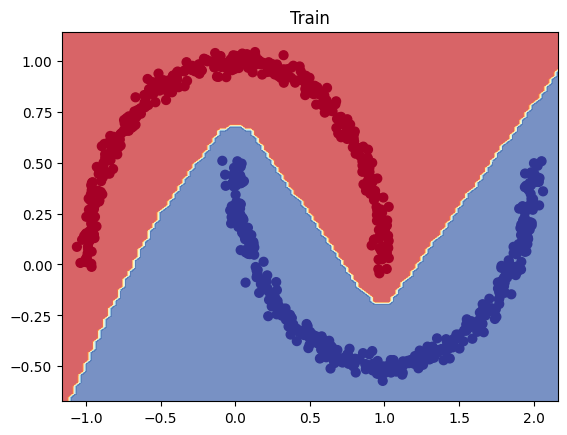

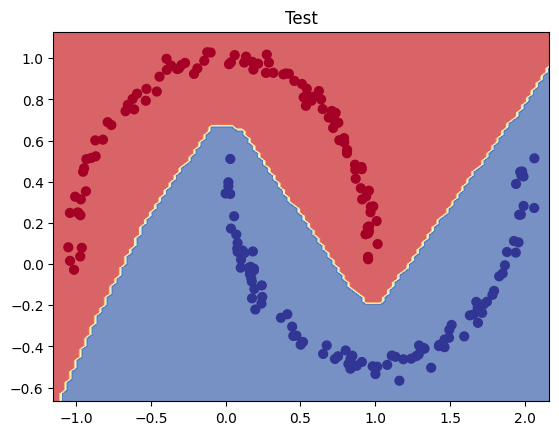

In [57]:
# Plot decision boundaries for training and test sets
# Visualizar con los datos de entrenamiento
plot_decision_boundary(model=model_0, X=X_train, y=y_train)
plt.title("Train")
plt.show()

# Visualizar con los datos de test
plot_decision_boundary(model=model_0, X=X_test, y=y_test)
plt.title("Test")
plt.show()

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [58]:
# Create a straight line tensor
x = torch.linspace(-5, 5, steps=100)

# Ver los primeros valores
print(x[:5])
print(x.shape)

tensor([-5.0000, -4.8990, -4.7980, -4.6970, -4.5960])
torch.Size([100])


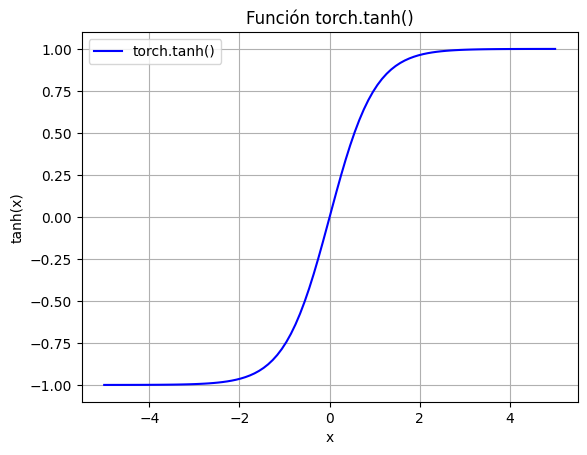

In [59]:
# Test torch.tanh() on the tensor and plot it

# Aplicar torch.tanh() al tensor x
y_torch = torch.tanh(x)

# Graficar
plt.plot(x, y_torch, label="torch.tanh()", color="blue")
plt.title("Función torch.tanh()")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.legend()
plt.show()

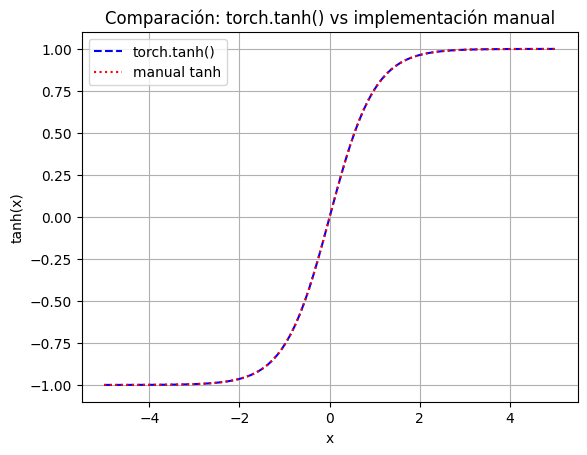

In [60]:
# Replicate torch.tanh() and plot it
y_manual = (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

# Graficar ambas funciones para compararlas
plt.plot(x, torch.tanh(x), label="torch.tanh()", linestyle="--", color="blue")
plt.plot(x, y_manual, label="manual tanh", linestyle=":", color="red")
plt.title("Comparación: torch.tanh() vs implementación manual")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.legend()
plt.show()


## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

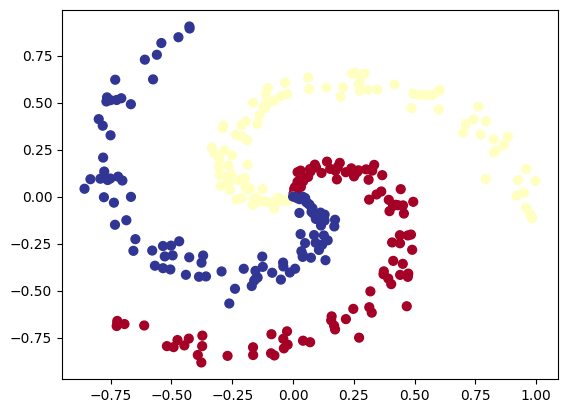

In [61]:
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [62]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
# Dividir en 80% train y 20% test
_train=0.8
_test=0.2

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=_train,
                                                    test_size=_test,
                                                    random_state=RANDOM_SEED)

# Enviar a CPU o GPU
X_train, X_test = X_train.to(_device), X_test.to(_device)
y_train, y_test = y_train.to(_device), y_test.to(_device)

In [64]:
# Let's calculuate the accuracy for when we fit our model
# Crear metrica de accuracy multiclase y enviarla al dispositivo
acc_fn = MulticlassAccuracy(num_classes=3).to(_device)

# Mostrar
acc_fn

MulticlassAccuracy()

In [65]:
# Create model by subclassing nn.Module
class SpiralModel(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=64, output_dim=3):
        super().__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        return self.output(x)

In [67]:
# Instantiate model and send it to device
model = SpiralModel().to(_device)
model

SpiralModel(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
)

In [68]:
# Setup data to be device agnostic
X_test = X_test.to(_device)
y_test = y_test.to(_device)

# Print out first 10 untrained model outputs (forward pass)
with torch.inference_mode():
    y_logits = model(X_test[:10])

    y_probs = torch.softmax(y_logits, dim=1)

    y_preds = torch.argmax(y_probs, dim=1)

# Mostrar resultados
print("Logits:")
print(y_logits)

print("\nPred probs:")
print(y_probs)

print("\nPred labels:")
print(y_preds)


Logits:
tensor([[ 0.1807,  0.0579, -0.1104],
        [ 0.1721,  0.0241, -0.2023],
        [ 0.1725,  0.0924, -0.1601],
        [ 0.1746,  0.0655, -0.1136],
        [ 0.1929,  0.0472, -0.1055],
        [ 0.1950,  0.0489, -0.1022],
        [ 0.1715,  0.1135, -0.0766],
        [ 0.1817,  0.0528, -0.1242],
        [ 0.1757,  0.0615, -0.1153],
        [ 0.1965,  0.1246, -0.1163]])

Pred probs:
tensor([[0.3800, 0.3361, 0.2840],
        [0.3921, 0.3382, 0.2697],
        [0.3788, 0.3496, 0.2716],
        [0.3779, 0.3388, 0.2833],
        [0.3837, 0.3317, 0.2847],
        [0.3836, 0.3314, 0.2850],
        [0.3671, 0.3464, 0.2865],
        [0.3823, 0.3361, 0.2816],
        [0.3788, 0.3380, 0.2832],
        [0.3756, 0.3496, 0.2748]])

Pred labels:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [69]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [70]:
# Número de épocas
_epochs = 1000

for epoch in range(_epochs):
  ## Training
  model.train()

  # 1. Forward pass
  y_logits = model(X_train)

  # 2. Calcular pérdida (loss)
  loss = loss_fn(y_logits, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backward (retropropagación)
  loss.backward()

  # 5. Actualizar pesos
  optimizer.step()

  ## Testing
  model.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model(X_test)

    # 2. Calcular pérdida y precisión
    test_loss = loss_fn(test_logits, y_test)
    test_preds = torch.argmax(test_logits, dim=1)
    test_acc = acc_fn(test_preds, y_test)

  # Mostrar progreso cada 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch {epoch:04d} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc*100:.2f}%")


Epoch 0000 | Train loss: 1.1073 | Test loss: 1.0619 | Test acc: 51.52%
Epoch 0100 | Train loss: 0.0354 | Test loss: 0.0089 | Test acc: 100.00%
Epoch 0200 | Train loss: 0.0222 | Test loss: 0.0009 | Test acc: 100.00%
Epoch 0300 | Train loss: 0.0179 | Test loss: 0.0002 | Test acc: 100.00%
Epoch 0400 | Train loss: 0.0161 | Test loss: 0.0001 | Test acc: 100.00%
Epoch 0500 | Train loss: 0.0152 | Test loss: 0.0001 | Test acc: 100.00%
Epoch 0600 | Train loss: 0.0147 | Test loss: 0.0001 | Test acc: 100.00%
Epoch 0700 | Train loss: 0.0144 | Test loss: 0.0000 | Test acc: 100.00%
Epoch 0800 | Train loss: 0.0142 | Test loss: 0.0000 | Test acc: 100.00%
Epoch 0900 | Train loss: 0.0142 | Test loss: 0.0000 | Test acc: 100.00%


In [72]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # Pasamos todo a la CPU
    model = model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_grid_tensor = torch.from_numpy(X_grid).type(torch.float32)

    model.eval()
    with torch.inference_mode():
        preds = model(X_grid_tensor)
        y_pred = torch.argmax(preds, dim=1).reshape(xx.shape)

    # Colores fijos para las clases
    cmap = ListedColormap(["#FF0000", "#00AAFF", "#FFFF00"])

    # Grafica
    plt.contourf(xx, yy, y_pred.numpy(), cmap=cmap, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=40, edgecolor='k')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

    # Volvemos a enviar el modelo a nuestro dispositivo original
    model.to(_device)

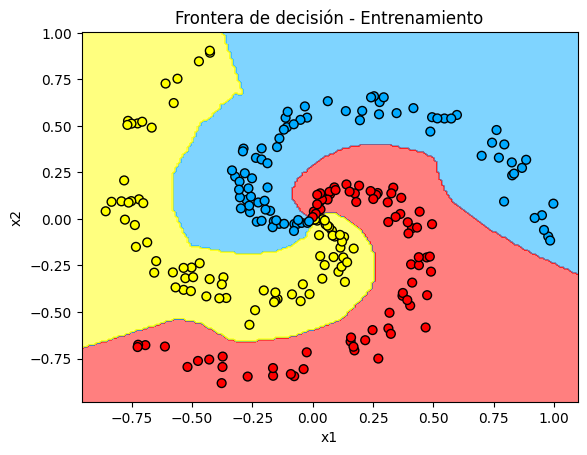

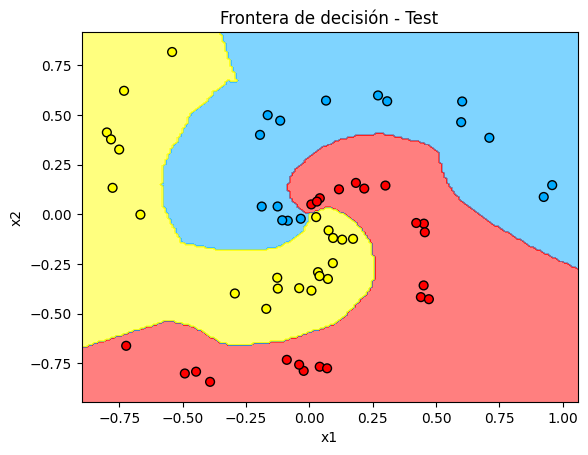

In [73]:
# Frontera de decision - Entrenamiento
plot_decision_boundary(model, X_train, y_train, title="Frontera de decisión - Entrenamiento")

# Frontera de decision - Test
plot_decision_boundary(model, X_test, y_test, title="Frontera de decisión - Test")